In [1]:
#Hide code cells when saving as HTML
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
#di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

In [2]:
#%run main_file.py

# Reporte de análisis de datos 

Se realizó el análisis para la base de datos del consumo de agua en la Ciudad de México. Los datos originales se obtuvieron en el siguiente [enlace][1].

[1]: https://datos.cdmx.gob.mx/explore/dataset/consumo-agua/table/

La documentación del archivo contiene las siguientes aclaraciones:

**Tipo de emisión**
- Consumo medido: Tratándose de tomas de agua donde se encuentre instalado o autorizado el medidor de consumo por parte del Sistema de Aguas.
- Consumo promedio:	El consumo promedio se considerará de la siguiente manera: 
  1. A falta de aparato medidor, en proceso de instalación o por imposibilidad material para ser instalado, dicho consumo promedio corresponderá a la colonia catastral en el que se encuentra el inmueble en que esté instalada la toma, siempre y cuando dicha colonia catastral el número de tomas con servicio medido sea mayor o igual al 70% del total de las tomas existentes en la colonia. El Sistema de Aguas publicará anualmente en la Gaceta Oficial de la Ciudad de México, la lista de las colonias catastrales que vayan contando con un 70% o más tomas con servicio medido, así como el consumo promedio de cada una de ellas en el ejercicio fiscal inmediato anterior. 
  2. Por descompostura del aparato medidor de consumo o cuando exista la imposibilidad de efectuar su lectura, se pagará tomando como base el consumo promedio de los últimos seis bimestres medidos del mismo uso que el actual anteriores al que se factura, sin que exceda de los últimos cinco ejercicios fiscales, quedando fuera de la estadística, el bimestre con facturación más alta.
  
**Uso**
- Doméstico: Inmuebles de uso Habitacional 
- No Doméstico: Inmuebles de uso no Habitacional
- Mixto: Inmuebles de uso Doméstico y No Doméstico simultáneamente

**Manzana**
- Es un segmento de la región que regularmente está delimitado por tres o más calles o límites semejantes, representada por los tres siguientes dígitos del mencionado número de cuenta catastral.

**Región** 
- Circunscripción convencional del territorio de la Ciudad de México determinada con fines de control catastral de los inmuebles, representada por los tres primeros dígitos del número de cuenta catastral asignado por la autoridad fiscal.

**Índice de Desarrollo**
- Índice de Desarrollo:	Construcción estadística mediante variables de tipo socioeconómico derivadas de información oficial, permite diferenciar territorialmente a la población de la Ciudad de México de acuerdo a su nivel de desarrollo económico, agregando la información a nivel manzana. 
    1. Popular: Clasificación que engloba a las manzanas que guardan características socioeconómicas similares y que se tipifican por tener los niveles de desarrollo más bajos de la Ciudad. En esta categoría se agrupa, además, las manzana que se encuentran dentro de la zona rural de la Ciudad de México.
    2. Bajo:	Clasificación que engloba a las manzanas que guardan características socioeconómicas similares y que se tipifican por tener niveles de desarrollo bajo de la Ciudad.
    3. Medio: Clasificación que engloba a las manzanas que guardan características socioeconómicas similares y que se tipifican por tener niveles de desarrollo medio de la Ciudad.
    4. Alto: Clasificación que engloba a las manzanas que guardan características socioeconómicas  similares y que se tipifican por tener niveles los más altos niveles de desarrollo de la Ciudad.

Nótese que aunque la nota aclaratoria hace mención de la cuenta catastral, ésta no se encuentra como variable en la base obtenida. Tampoco se especifica la unidad de las variables, aunque por su nomeclatura podemos pensar que se trata de metros cúbicos.

Las caracteristicas generales de la base original se muestran a continuación:

In [3]:
import load_data 
import clean_data
import transform_data
import eda
import geda

In [4]:
# Path to data file
path_to_datafile = '/home/bj/Documents/IntroDataScience/eda_hw/Data'
# Name of data file
datafile_name = 'consumo-agua.csv'
# Load data 
consumo_agua = load_data.load_df(datafile_name, path_to_datafile, ';')
# Initial information about the dataframe
eda.df_variables_info(consumo_agua)

Number of variables: 17
Number of observations: 71102
Type of variables in the dataframe: 
 float64    8
object     6
int64      3
dtype: int64


De un primer acercamiento, podemos notar que, en términos de la información contenida, se tienen distintas observaciones para las diferentes alcaldías y colonias de la Ciudad de México relativas al consumo de agua para los 3 bimestres del presente año (2019). Algunas de las peculiaridades de la base son las siguientes:

- Existe una variable que identifica cada observación (id) que es *gid*
- La variable *nomgeo* y *alcaldia* aportan información muy similar
- La variable *geo_point* contiene dentro de sí información de longitud y latitud
- Variables como *geo_point* y *geo_shape* parecen aportar información acerca de la geolocalización de la unidad observacional

En términos del formato de la base, observamos que existía una falta de homogeneización en los nombres de las columnas, y que había columnas cuyo contenido correspondía a dos características diferentes. Así que lo primero que se hizo fue un tratamiento de la base para estandarizar los nombres de las columnas, estandarizar los valores de las variables que contienen texto, guardar la información contenida en la variable *geo_point* en dos nuevas variables llamadas *latitud* y *longitud* y, finalmente, se eliminaron las variables *geo_point* y *geo_shape*.
Después de este proceso, la información general se actualizó a lo siguiente:

In [5]:
#Standardization of name variables
clean_consumo_agua = clean_data.clean_variables_names(consumo_agua)
### Transform the data
# Split the variable  variables
clean_consumo_agua = transform_data.split_string_column_into_numeric_columns(clean_consumo_agua, "geo_point", ',', \
                                                              ['latitud', 'longitud'])
# Drop geo_point and geo_shape variables
clean_consumo_agua.drop(['geo_point', 'geo_shape'], axis = 1, inplace = True)
# Standardization of value variables
final_consumo_agua = transform_data.clean_variables_values(clean_consumo_agua, ['nomgeo', 'alcaldia', 'colonia', 'indice_des'])

#
eda.df_variables_info(consumo_agua)

Number of variables: 17
Number of observations: 71102
Type of variables in the dataframe: 
 float64    10
object      4
int64       3
dtype: int64


Donde las variables numéricas son 13 y se llaman:

In [6]:
#Identify numeric variables
numeric_variables = final_consumo_agua.select_dtypes(include = 'number').columns.values
numeric_variables = numeric_variables[[10, 11, 12, 1, 8, 5, 0, 3, 9, 6, 4, 7, 2]]
print(numeric_variables)

['gid' 'latitud' 'longitud' 'anio' 'bimestre' 'consumo_total'
 'consumo_total_mixto' 'consumo_total_dom' 'consumo_total_no_dom'
 'consumo_prom' 'consumo_prom_mixto' 'consumo_prom_no_dom'
 'consumo_prom_dom']


Mientras que las variables categoricas son:

In [7]:
#Identify string variables
string_variables = final_consumo_agua.select_dtypes(include = 'object').columns.values   
print(string_variables)

['nomgeo' 'alcaldia' 'colonia' 'indice_des']


## Data profiling

A continuación se muestra un resumen de los principales estadísticos para las **variables numéricas** de la base.

In [8]:
#Descriptive statistics for numeric variables
eda.descriptive_stats_for_numeric_vars(final_consumo_agua, numeric_variables)

,gid,latitud,longitud,anio,bimestre,consumo_total,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom,consumo_prom,consumo_prom_mixto,consumo_prom_no_dom,consumo_prom_dom
n_observations,71102,71102,71102,71102,71102,71102,62775,66282,71102,71102,62775,71102,66282
max,71102,19.5791,-98.9505,2019,3,119727,23404.4,95060.7,119727,89691.8,11702.2,89691.8,7796.41
min,1,19.1359,-99.3377,2019,1,0,0,0,0,0,0,0,0
mean,35551.5,19.3923,-99.1329,2019,2.00681,1695.85,174.36,1186.26,436.06,111.217,50.6362,126.76,29.1324
std_dev,20525.5,0.0705495,0.0578902,0,0.814393,3555.7,312.664,2771.04,2126.15,1069.95,130.409,1095.82,64.5659
25%,17776.2,19.3441,-99.1725,2019,1,340.952,0,161.635,10.98,23.0101,0,6.27542,18.6905
median,35551.5,19.3929,-99.1352,2019,2,896.175,79.94,604.185,54.055,31.6938,33.4517,19.28,26.4142
75%,53326.8,19.4468,-99.0966,2019,3,1808.9,233.32,1261.45,230.43,45.4849,61.2165,54.1869,36.2466
kurtosis,-1.2,-0.329997,0.0331785,0,-1.49214,195.878,1419.36,248.041,798.075,2599.54,3263.99,2364.16,7663.65
skewness,1.3012e-17,-0.220968,0.124723,0,-0.0124737,10.9983,21.7654,12.5232,22.5074,43.3827,43.6004,40.7165,74.8186


Con ayuda del resumen de las variables obtenido identificamos lo siguiente:
- Existen diversas variables de consumo de agua, entre las que se encuentran *consumo_total_mixto*, *consumo_prom_mixto*, *consumo_no_dom*, entre otras, observando que existe más de una observación por colonia/alcaldía. Lo anterior arroja el indicativo de que la unidad observacional podrían referirse a manzanas contenidas en cada colonia.
- No se tiene el mismo numero de observaciones en cada bimestre
- Los valores de latitud y longitud son congruentes con la ubiación de la Ciudad de México
- El valor minimo para las variables de consumo es cero, lo que podría indicar errores en el proceso de agregacion de los datos, pues a nivel "medidor", siempre se calcula el consumo
- Los cuantiles obtenidos, junto con los máximos y mínimos señalan valores atípicos en todas las variables
- Las variables de consumo (*consumo_total, consumo_total_mixto, consumo_total_dom, consumo_total_no_dom, consumo_prom, consumo_prom_mixto, consumo_prom_no_dom, consumo_prom_dom*) presentan un sesgo positivo (hacia la derecha)
- Llama la atención que el cuantil al 25% sea cero para las variables *consumo_total_mixto* y *consumo_prom_mixto*
- Las variables *consumo_total_mixto* y *consumo_prom_mixto* tienen el aproximadamente el 12% de valores faltantes
- Por su parte, las variables *consumo_total_dom* y *consumo_prom_dom* tienen el 7% de valores faltantes


Como se menciono, las variables *consumo_total_mixto* y *consumo_prom_mixto* tienen datos faltantes y de la gráfica siguiente podemos observar que estos datos faltantes se encuentran en las mismas observaciones para ambas variables. Lo mismo pasa para las columnas de *consumo_total_dom* y *consumo_prom_dom*. 

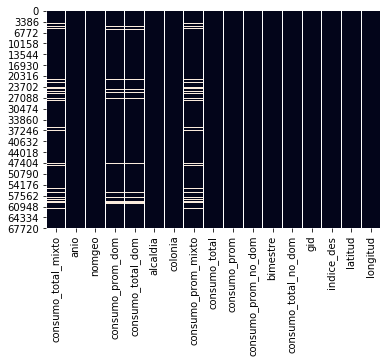

In [9]:
geda.plot_missing_values(final_consumo_agua)

Para las **variables categoricas** tenemos que, 
- Las categorías conformadas por las alcaldías y colonias corresponde a la división actual de la Ciudad de México
- Existe una diferencia entre el número de categorías entre las variables *nomgeo* y *alcaldia*, que puede tratarse de un error, pues ambas variables paracen tener la misma información
- No hay valores faltantes para ninguna variable
- Las categorias de *indice_des* coinciden con las mencionadas en la nota aclaratoria
- La alcaldia Iztapalapa es la más repetida, probablemente por ser la alcandía con mayor población de la ciudad

La siguiente tabla muestra el resumen de indicadores.

In [10]:
#Descriptive statistics
eda.descriptive_stats_for_categorical_vars(final_consumo_agua,string_variables)

,nomgeo,alcaldia,colonia,indice_des
n_observations,71102,71102,71102,71102
mode,iztapalapa,iztapalapa,centro,bajo
num_categories,17,16,1340,4
categories,"[gustavo_a_madero, azcapotzalco, coyoacan, tal...","[gustavo_a_madero, azcapotzalco, coyoacan, tla...","[7_de_noviembre, nueva_tenochtitlan, prohogar,...","[alto, medio, popular, bajo]"
n_unique_values,17,16,1340,4
n_missings,0,0,0,0
%_missings,0,0,0,0
Top1_most_common,iztapalapa,iztapalapa,centro,bajo
Top2_most_common,gustavo_a_madero,gustavo_a_madero,agricola_oriental,popular
Top3_most_common,cuauhtemoc,cuauhtemoc,roma_norte,alto


A continuación se presentan las gráficas de la distribución de la alcaldía (*alcaldia*) y del índice de desarrollo (*indice_des*). Podemos notar que las alcaldías de Iztapalapa y Gustavo A. Madero son las que acumulan el mayor número de observaciones. Por otro lado, el índice de desarrollo en la Ciudad de México es bajo, representando poco más del 40% de las observaciones en la base.

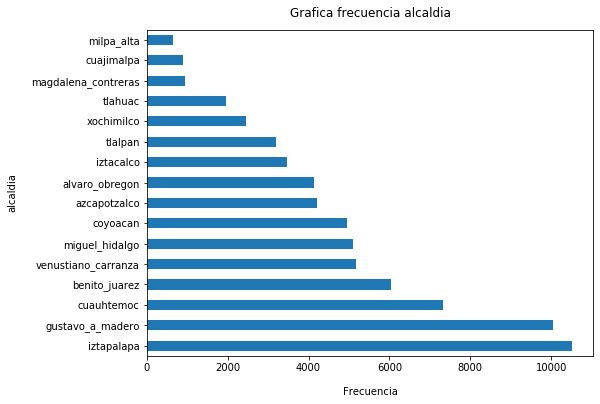

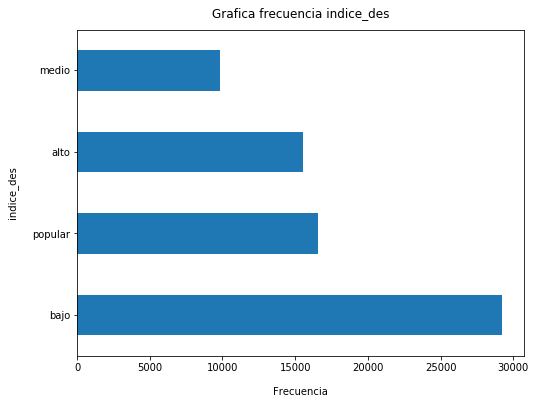

In [11]:
geda.barplot_categorical_vars(final_consumo_agua, ['alcaldia', 'indice_des'])

## Preguntas de investigación

Se plantearon e investigaron las siguientes hipótesis:

#### ¿Existe una relación entre el consumo de agua y la zona (alcaldía y/o colonia)?


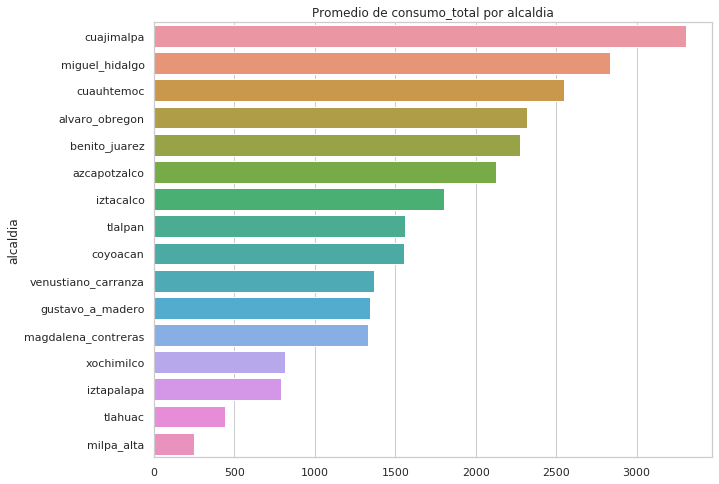

In [12]:
geda.barplot_by_category(final_consumo_agua, 'consumo_total', 'alcaldia')

La gráfica señala que existe un mayor numero de observaciones para la alcaldía de Iztapalapa y GUstvo A Madero, sin embargo no existe una relación directamente proporcional para con el consumo, pues observamos que Cuajimalpa es la alcaldía con mayor consumo con un promedio de 3,304 metros cúbicos de agua en los 3 bimestres del 2019. Contrastantements y Milpa Alta tiene un consumo promedio de 247 metros cúbicos en el mismo periodo. Es decir, dentro de las 2 alcaldias con menor numero de registros yacen las alcaldías con mayor y menor consumo.

El que existan menos observaciones para la zonas de bajo indice de desarrollo, lo que podría sugerir que el consumo en estas zonas es mayor al de las zonas de alto indice de desarrollo, pues se asume que existen más zonas de bajo desarrollo conforme la distribución de la riqueza de la CDMX

#### ¿Existe relación entre el consumo de agua y el nivel de desarrollo de la zona?

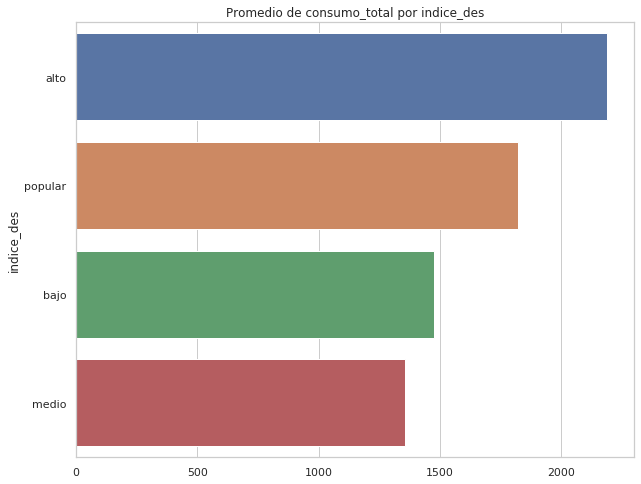

In [13]:
geda.barplot_by_category(final_consumo_agua, 'consumo_total', 'indice_des')



Inicialmente, se había planteado la hipótesis de que las observaciones con un índice de desarrollo alto y bajo, tendrían un mayor consumo promedio de agua. De la gráfica anterior podemos observar que esto se cumple para las de indice alto, pero no se cumple para las que tienen un índice de desarrollo bajo.  Sorprendentemente, aquellas observaciones con índice de desarrollo medio son las de menor consumo promedio.

Si estuvieramos interesados en desarrollar un programa de ahorro de agua, sería interesante estudiar las características de esta población, e identificar más claramente cuales son los factores que originan el alto consumo en una u otra zona (el tipo de viviendas de cada zona debe ser claramente distinto por construcción)

#### Consumo de agua por tipo de uso

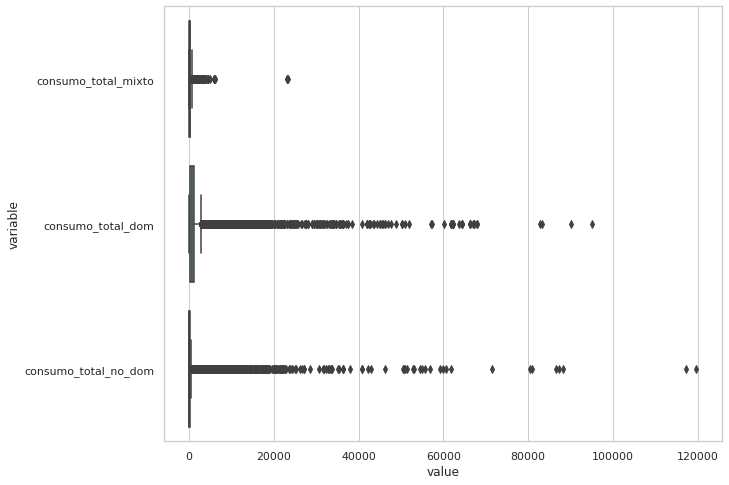

In [14]:
geda.boxplot_all(final_consumo_agua, ['consumo_total_mixto', 'consumo_total_dom', 'consumo_total_no_dom'])

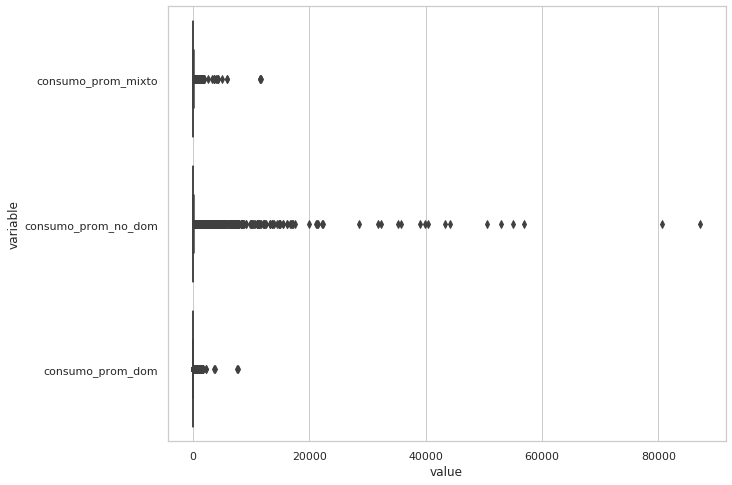

In [15]:
geda.boxplot_all(final_consumo_agua, ['consumo_prom_mixto', 'consumo_prom_no_dom', 'consumo_prom_dom'])

De las gráficas anteriores podemos observar que hay un número significativo de valores extremos para todas las variables de consumo. Esto podría ser un indicador de errores en la base, por ejemplo en las unidades. Es indudable que se requiere un análisis de valores atípicos para entender mejor la distribución de estas variables. Otros factores que podrían incidir en las mediciones son las fugas o robos de agua, o escases de agua, recordando que un consumo bajo de agua no necesariamente implicaría un menor requerimiento o cuidado del recurso, sino que se podría tratar de una zona estresada en la disponibilidad de dicho recurso.

#### Matriz de correlaciones

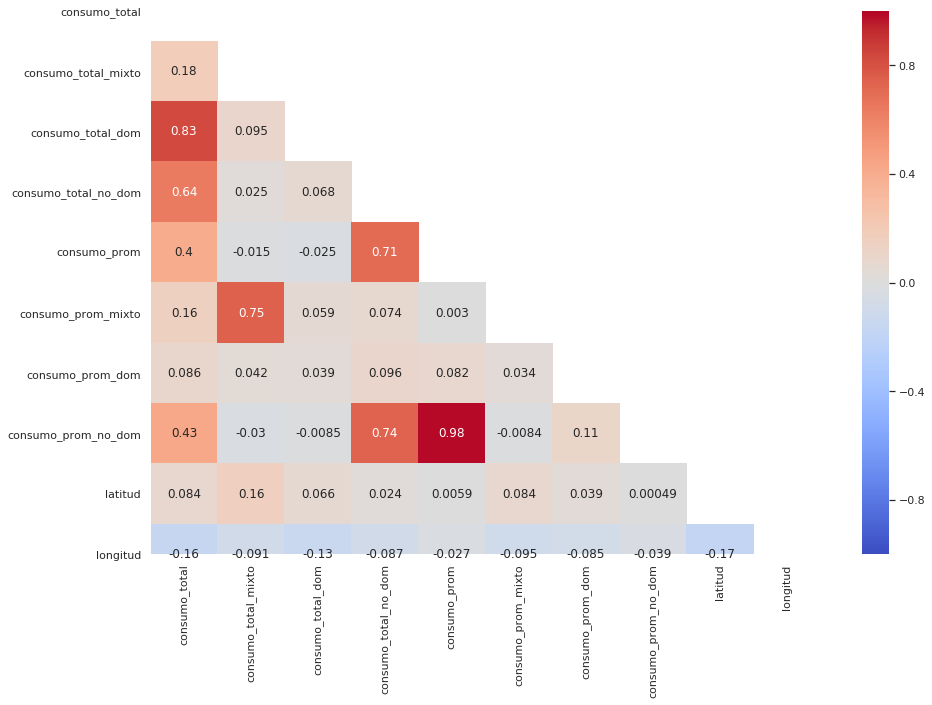

In [16]:
geda.plot_heatmap_corr(final_consumo_agua, ['consumo_total', 'consumo_total_mixto', 'consumo_total_dom', 'consumo_total_no_dom',
  'consumo_prom', 'consumo_prom_mixto', 'consumo_prom_dom', 'consumo_prom_no_dom',  'latitud', 'longitud'])

De la matriz de correlaciones observamos que el consumo total (*consumo_total*) esta altamente correlacionado con el consumo doméstico (*consumo_total_dom*) y ligeramente correlacionado con el consumo no doméstico (*consumo_total_no_dom*). También podemos notar que las correlaciones son altas entre las variables de consumo total y de consumo promedio, lo cual es algo esperado.

Respecto a las variables de latitud y longitud, destaca que prevalece una relación lineal inversa entre las variables de consumo y la longitud (aunque todas muy similares), aunque la latitud es un poco diferente, la latitud tiene comportamientos ligeramente diferente con las distintas variables de consumo, por ejemplo, la relación de latitud con consumo total mixto es distinta con la de consumo promedio no domiciliado, lo cual sugiere una mayor diferenciación en el consumo acorde si está más al oriente que al occidente.